<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Import Needed Libraries
    </h1>
    </div>

In [38]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectPercentile, chi2 , f_classif ,SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  ConfusionMatrixDisplay, classification_report , accuracy_score
import warnings
warnings.filterwarnings('ignore')

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Reading Dataset And Get Info
    </h1>
    </div>

In [39]:
df = pd.read_csv('heart_disease_risk_dataset_earlymed.csv')

In [40]:
# Show Sample of Data
df.sample(5)

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
12790,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,51.0,1.0
15288,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0
36365,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,56.0,1.0
19609,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,83.0,1.0
47705,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,72.0,1.0


In [41]:
# Show Shape of Data
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 70000
Number of Columns : 19


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           70000 non-null  float64
 1   Shortness_of_Breath  70000 non-null  float64
 2   Fatigue              70000 non-null  float64
 3   Palpitations         70000 non-null  float64
 4   Dizziness            70000 non-null  float64
 5   Swelling             70000 non-null  float64
 6   Pain_Arms_Jaw_Back   70000 non-null  float64
 7   Cold_Sweats_Nausea   70000 non-null  float64
 8   High_BP              70000 non-null  float64
 9   High_Cholesterol     70000 non-null  float64
 10  Diabetes             70000 non-null  float64
 11  Smoking              70000 non-null  float64
 12  Obesity              70000 non-null  float64
 13  Sedentary_Lifestyle  70000 non-null  float64
 14  Family_History       70000 non-null  float64
 15  Chronic_Stress       70000 non-null 

In [43]:
# Check NaN Value
df.isna().sum()

Chest_Pain             0
Shortness_of_Breath    0
Fatigue                0
Palpitations           0
Dizziness              0
Swelling               0
Pain_Arms_Jaw_Back     0
Cold_Sweats_Nausea     0
High_BP                0
High_Cholesterol       0
Diabetes               0
Smoking                0
Obesity                0
Sedentary_Lifestyle    0
Family_History         0
Chronic_Stress         0
Gender                 0
Age                    0
Heart_Risk             0
dtype: int64

In [44]:
# Describe Numiric Data
df.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.499229,0.500586,0.498571,0.498729,0.501414,0.498929,0.501500,0.502457,0.497429,0.499214,0.500643,0.502971,0.499157,0.503543,0.497629,0.499957,0.548929,54.461986,0.500000
std,0.500003,0.500003,0.500002,0.500002,0.500002,0.500002,0.500001,0.499998,0.499997,0.500003,0.500003,0.499995,0.500003,0.499991,0.499998,0.500004,0.497604,16.410794,0.500004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,56.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,1.000000


In [45]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
Chest_Pain,70000,0,0.0,2
Shortness_of_Breath,70000,0,0.0,2
Fatigue,70000,0,0.0,2
Palpitations,70000,0,0.0,2
Dizziness,70000,0,0.0,2
Swelling,70000,0,0.0,2
Pain_Arms_Jaw_Back,70000,0,0.0,2
Cold_Sweats_Nausea,70000,0,0.0,2
High_BP,70000,0,0.0,2
High_Cholesterol,70000,0,0.0,2


In [46]:
# Check Dublication
df.duplicated().sum()

6245

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Handling Dublication Data
    </h1>
    </div>

## Drop Duplication

In [47]:
df.drop_duplicates(inplace = True)

In [48]:
# After Drop Duplication 
df.duplicated().sum()

0

In [49]:
# Show Shape of Data
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 63755
Number of Columns : 19


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63755 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           63755 non-null  float64
 1   Shortness_of_Breath  63755 non-null  float64
 2   Fatigue              63755 non-null  float64
 3   Palpitations         63755 non-null  float64
 4   Dizziness            63755 non-null  float64
 5   Swelling             63755 non-null  float64
 6   Pain_Arms_Jaw_Back   63755 non-null  float64
 7   Cold_Sweats_Nausea   63755 non-null  float64
 8   High_BP              63755 non-null  float64
 9   High_Cholesterol     63755 non-null  float64
 10  Diabetes             63755 non-null  float64
 11  Smoking              63755 non-null  float64
 12  Obesity              63755 non-null  float64
 13  Sedentary_Lifestyle  63755 non-null  float64
 14  Family_History       63755 non-null  float64
 15  Chronic_Stress       63755 non-null  floa

In [51]:
# Describe Numiric Data
df.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
count,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000,63755.000000
mean,0.493891,0.495145,0.493514,0.493499,0.496839,0.493702,0.496636,0.497608,0.494502,0.495443,0.497655,0.499365,0.495726,0.500494,0.493797,0.495679,0.544757,54.328210,0.493875
std,0.499967,0.499980,0.499962,0.499962,0.499994,0.499964,0.499993,0.499998,0.499974,0.499983,0.499998,0.500004,0.499986,0.500004,0.499965,0.499985,0.497997,16.414121,0.499966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,55.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,66.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,1.000000


In [52]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
Chest_Pain,63755,0,0.0,2
Shortness_of_Breath,63755,0,0.0,2
Fatigue,63755,0,0.0,2
Palpitations,63755,0,0.0,2
Dizziness,63755,0,0.0,2
Swelling,63755,0,0.0,2
Pain_Arms_Jaw_Back,63755,0,0.0,2
Cold_Sweats_Nausea,63755,0,0.0,2
High_BP,63755,0,0.0,2
High_Cholesterol,63755,0,0.0,2


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Detection Outliers 
    </h1>
    </div>

In [53]:
def detect_outliers_iqr(df, columns, threshold = 1.5):

    outlier_indices = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Finding outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outlier_indices[col] = outliers
    
    return outlier_indices

numerical_columns = ['Age']
outliers_iqr = detect_outliers_iqr(df, numerical_columns)

for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers detected")

Age: 0 outliers detected


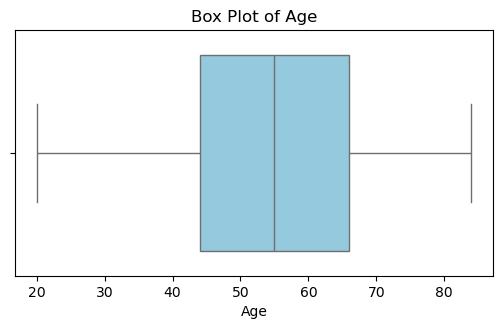

In [54]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(x = df[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout() 
plt.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         EDA of Data and Get Insights
    </h1>
    </div>

## Age distribution in the data

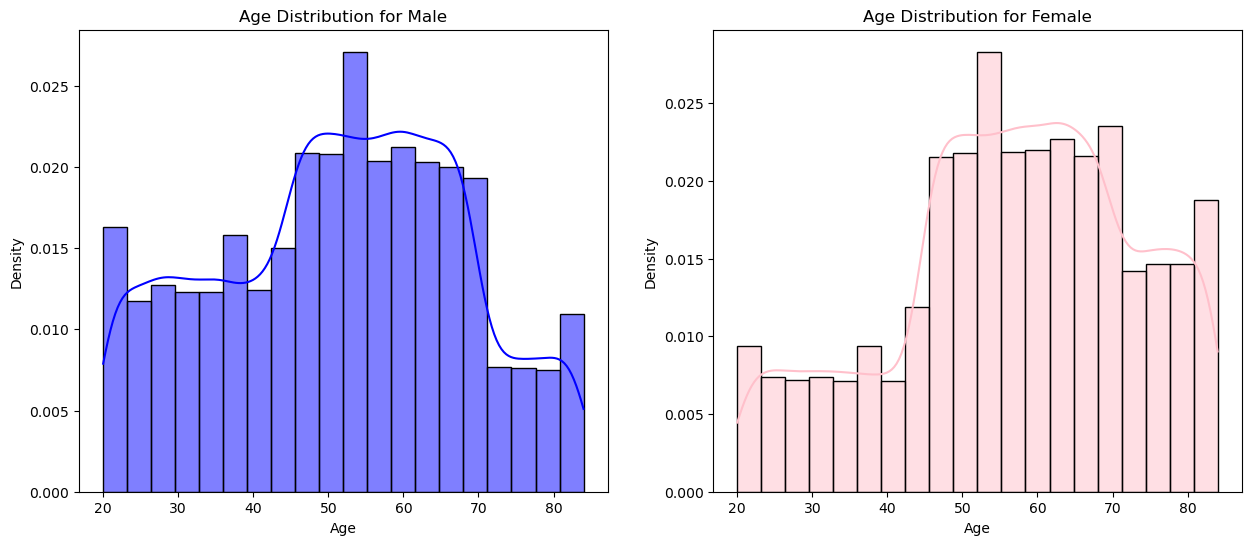

In [55]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)

sns.histplot(df[df['Gender'] == 0]['Age'], color='blue', kde=True, bins=20, stat='density')
plt.title('Age Distribution for Male')

plt.subplot(1,2,2)

sns.histplot(df[df['Gender'] == 1]['Age'], color='pink', kde=True, bins=20, stat='density')
plt.title('Age Distribution for Female')

plt.show()

- Most Ranges of Age between 50 to 60 

In [56]:
fig = px.pie(values = df['Gender'].value_counts(),
             names = ['Female','Male'],
             template = 'plotly_dark',
             title = 'The Percentage of Type of Gender in the Data'
             ).update_traces(textinfo='label+percent')

fig.show()

- Female are the dominant Category in the data

## Distribution of Age with Heart Risk

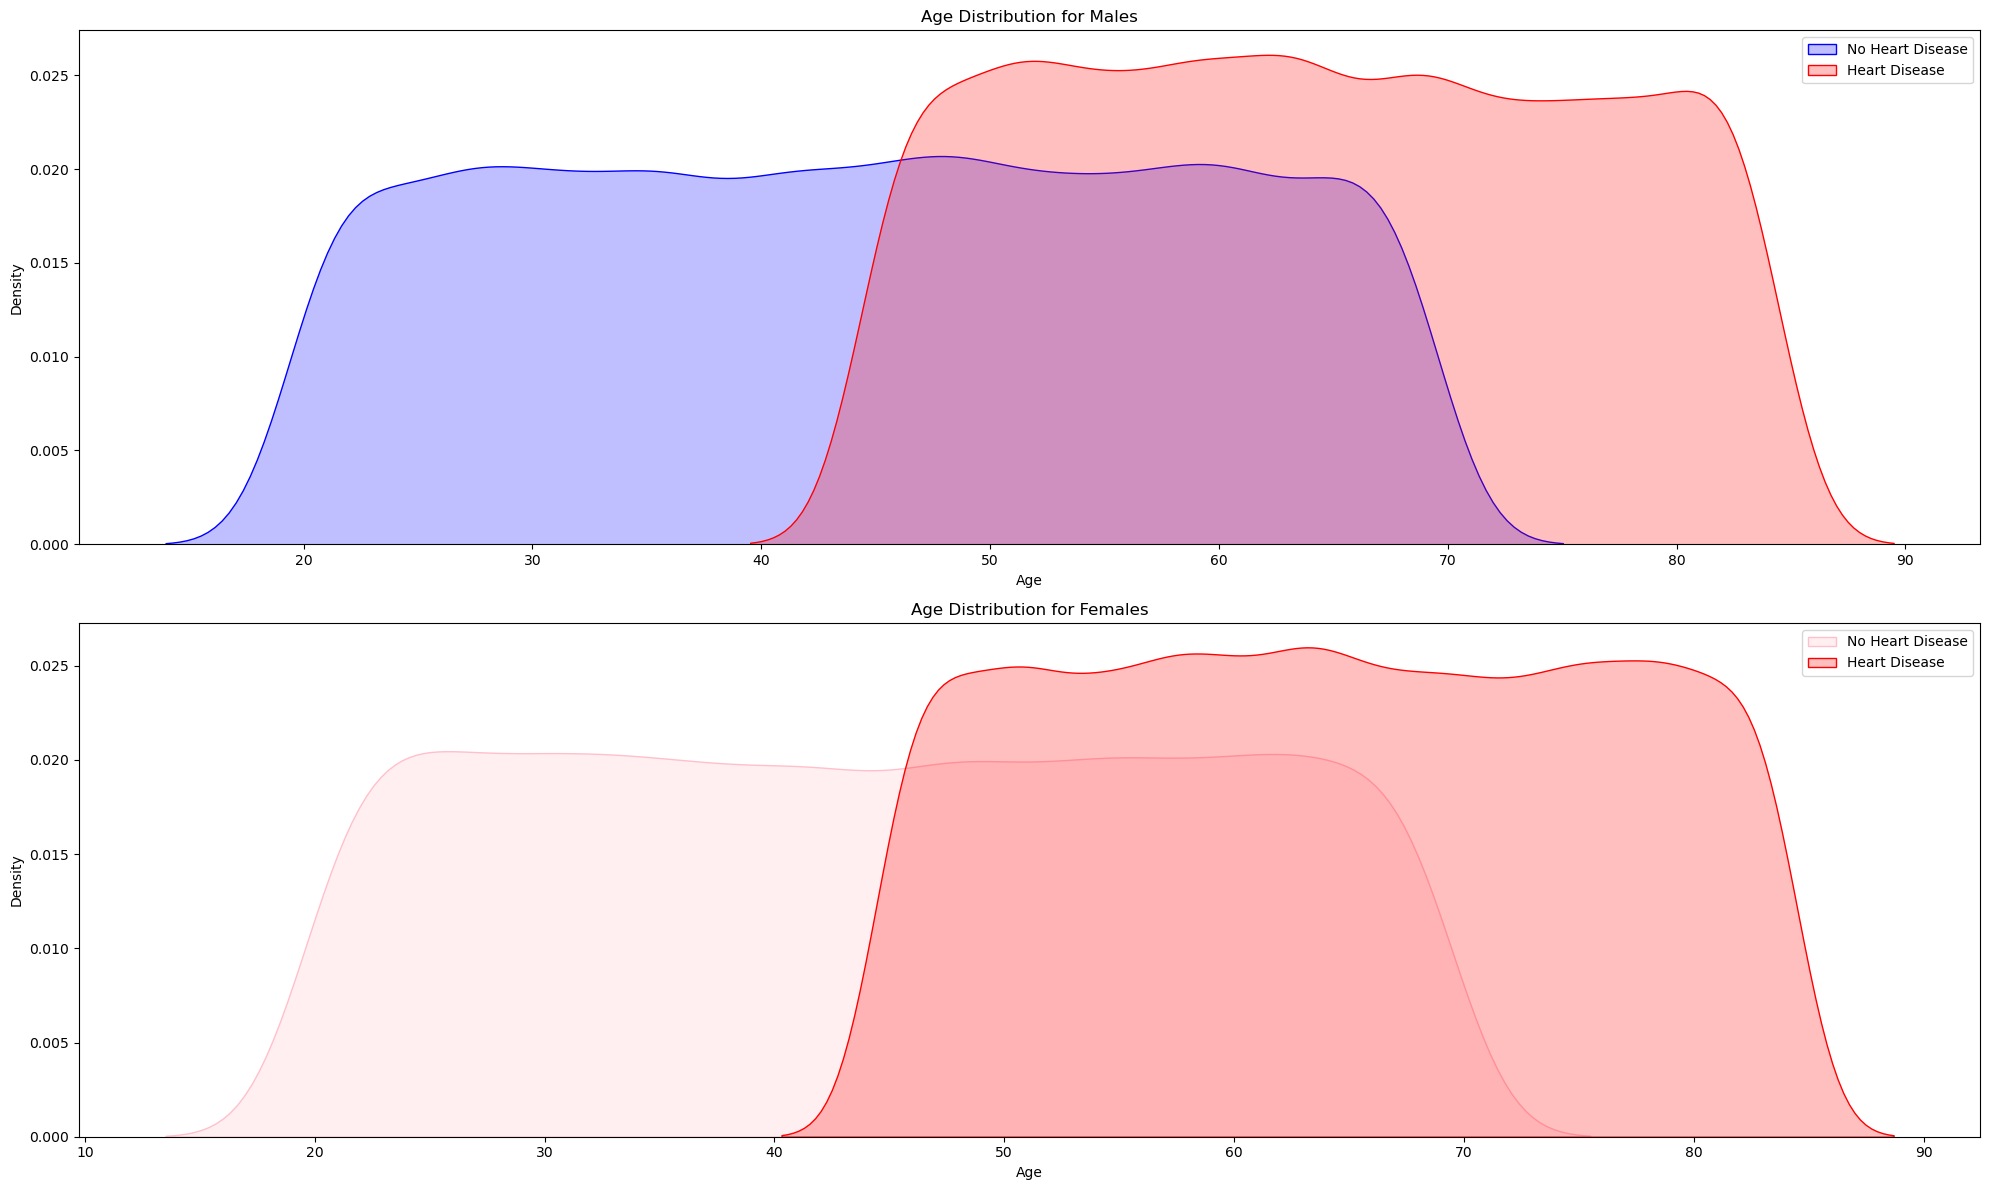

In [57]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 1, 1)
sns.kdeplot(df[(df['Gender'] == 0) & (df['Heart_Risk'] == 0)]['Age'], color='blue', fill=True, label='No Heart Disease')
sns.kdeplot(df[(df['Gender'] == 0) & (df['Heart_Risk'] == 1)]['Age'], color='red', fill=True, label='Heart Disease')
plt.title('Age Distribution for Males')
plt.legend()

plt.subplot(2, 1, 2)
sns.kdeplot(df[(df['Gender'] == 1) & (df['Heart_Risk'] == 0)]['Age'], color='pink', fill=True, label='No Heart Disease')
sns.kdeplot(df[(df['Gender'] == 1) & (df['Heart_Risk'] == 1)]['Age'], color='red', fill=True, label='Heart Disease')
plt.title('Age Distribution for Females')
plt.legend()

plt.tight_layout()
plt.show()


- Most occur Heart Disease After 40

## Chest Pain For Each Gender of Sex

#### Presence of chest pain, a common symptom of heart disease.

In [58]:
df['Chest_Pain_category'] = df['Chest_Pain'].map({0:'No',1:'Yes'})
fig = px.bar(df[df['Heart_Risk'] == 1]['Chest_Pain_category'].value_counts(),
             color = df[df['Heart_Risk'] == 1]['Chest_Pain_category'].value_counts().index,
             template = 'plotly_dark',
             title = 'Chest Pain For People Has Heart Risk',
             labels = {'value':'Count','Chest_Pain_category':'Chest Pain'},
             text_auto = True
             )
fig.show()

#### Most Chest Pain 
- Occur With Heart Risk

## Shortness of Breath

#### Difficulty breathing, often associated with heart conditions.

In [59]:
df['Shortness_of_Breath_category'] = df['Shortness_of_Breath'].map({0:'No',1:'Yes'})
fig = px.bar(df[df['Heart_Risk'] == 1]['Shortness_of_Breath_category'].value_counts(),
             color = df[df['Heart_Risk'] == 1]['Shortness_of_Breath_category'].value_counts().index,
             template = 'plotly_dark',
             title = 'Shortness of Breath For People Has Heart Risk',
             labels = {'value':'Count','Shortness_of_Breath_category':'Shortness of Breath'},
             text_auto = True
             )
fig.show()

#### Most Shortness of Breath
- Occur With Heart Risk

In [60]:
columns = df.columns[2:-5].to_list()
df2 = df.copy()

In [61]:
for column in columns:
    df2[column] = df2[column].map({0:'No',1:'Yes'})
    fig = px.bar(df2[df2['Heart_Risk'] == 1][column].value_counts(),
             color = df2[df2['Heart_Risk'] == 1][column].value_counts().index,
             template = 'plotly_dark',
             title = f'{column} For People Has Heart Risk',
             labels = {'value':'Count'},
             text_auto = True
             )
    fig.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         Data Preprocessing
    </h1>
    </div>

## Handling Object DataType

In [62]:
df.drop(['Chest_Pain_category','Shortness_of_Breath_category'],axis=1,inplace=True)

## Assign feature and target variables

In [63]:
fig = px.imshow(df.corr(), 
                text_auto=True, 
                color_continuous_scale = "tempo",  
                template='plotly_dark',
                title="Correlation Heatmap")
fig.update_layout(
    width=1000, 
    height=800  
)
fig.show()

In [64]:
X = df.drop('Heart_Risk' , axis = 1)
y = df['Heart_Risk']

In [65]:
def FeatureSelectionByPercentile(X,y,Percentile) : 
    FeatureSelection = SelectPercentile(score_func = f_classif, percentile=Percentile)
    X_Selected = FeatureSelection.fit_transform(X, y)
    NewData = pd.DataFrame(X_Selected,columns =[i for i,j in zip(X.columns,FeatureSelection.get_support()) if j ] )
    NewData['Heart_Risk'] = y
    return NewData
    
NewData = FeatureSelectionByPercentile(X,y,70)      

In [66]:
NewData.sample(5)

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Sedentary_Lifestyle,Age,Heart_Risk
46372,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,33.0,1.0
38950,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,78.0,NaN
42572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,22.0,0.0
41777,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,26.0,0.0
27436,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,77.0,1.0


In [67]:
Feature_Selection_Columns = NewData.columns.tolist()
df2 = df[Feature_Selection_Columns]

In [68]:
fig = px.imshow(df2.corr(), 
                text_auto=True, 
                color_continuous_scale = "tempo",  
                template='plotly_dark',
                title="Correlation Heatmap")
fig.update_layout(
    width=1000, 
    height=800  
)
fig.show()

In [69]:
X = df2.drop('Heart_Risk' , axis = 1)
y = df2['Heart_Risk']

## Splitting Data 

In [70]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 44 , shuffle = True)

In [71]:
print(f'Shape of X_Train {X_train.shape}')
print(f'Shape of X_Test {X_test.shape}')
print(f'Shape of Y_Train {y_train.shape}')
print(f'Shape of Y_Test {y_test.shape}')

Shape of X_Train (47816, 12)
Shape of X_Test (15939, 12)
Shape of Y_Train (47816,)
Shape of Y_Test (15939,)


In [72]:
joblib.dump(X_test, 'x_test.pkl')
joblib.dump(y_test, 'y_test.pkl')

['y_test.pkl']

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         Modeling
    </h1>
    </div>

## Use Different Models Algorithm

In [73]:
def Kfold(model,model_name):
    model = cross_val_score(model , X , y , cv = 10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train,y_train)
    model_test_score = model.score(X_test,y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def run_grid_search(X_train, y_train, cv=10):
    classifiers = {
        'LogisticRegression': (LogisticRegression(max_iter=1000), {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }),
        'RandomForest': (RandomForestClassifier(), {
            'n_estimators': [50, 100],
            'max_depth': [None, 10, 20],
        }),
        'GradientBoosting': (GradientBoostingClassifier(), {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5],
        }),
        'Bagging': (BaggingClassifier(), {
            'n_estimators': [10, 50,100],
        }),
        'DecisionTree': (DecisionTreeClassifier(), {
            'max_depth': [None, 5, 10],
            'criterion': ['gini', 'entropy'],
        }),
        'KNeighbors': (KNeighborsClassifier(), {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
        }),
        'XGBoost': (XGBClassifier(eval_metric='logloss', use_label_encoder=False), {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5],
        }),
    }

    best_models = {}

    for name, (model, params) in classifiers.items():
        print(f"Running GridSearchCV for {name}...")
        grid = GridSearchCV(model, param_grid=params, cv=cv, n_jobs=-1)
        grid.fit(X_train, y_train)
        best_models[name] = grid.best_estimator_
        print(f"Best {name}: {grid.best_params_}")
        print("--------------------------------------------------------------------")
    return best_models

def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

## Get Best Parameter

In [74]:
GreadSearch = run_grid_search(X_train, y_train)

Running GridSearchCV for LogisticRegression...
Best LogisticRegression: {'C': 0.1, 'solver': 'lbfgs'}
--------------------------------------------------------------------
Running GridSearchCV for RandomForest...
Best RandomForest: {'max_depth': 10, 'n_estimators': 100}
--------------------------------------------------------------------
Running GridSearchCV for GradientBoosting...
Best GradientBoosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
--------------------------------------------------------------------
Running GridSearchCV for Bagging...
Best Bagging: {'n_estimators': 50}
--------------------------------------------------------------------
Running GridSearchCV for DecisionTree...
Best DecisionTree: {'criterion': 'entropy', 'max_depth': None}
--------------------------------------------------------------------
Running GridSearchCV for KNeighbors...
Best KNeighbors: {'n_neighbors': 7, 'weights': 'uniform'}
------------------------------------------------------

## Logistic Regression

In [75]:
lr_GridSearch = LogisticRegression(C=0.1,solver='lbfgs')
Kfold(lr_GridSearch, "Logistic Regression")
train(lr_GridSearch, "Logistic Regression")

Logistic Regression score on cross validation: 98.44090560188944%
Logistic Regression model score on Training data: 98.43776141877197%
Logistic Regression model score on Testing data: 98.47543760587239%


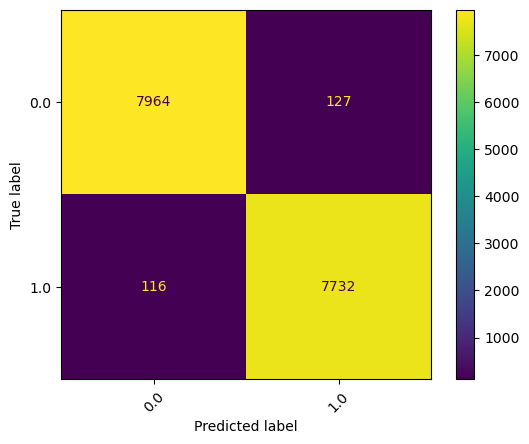

In [76]:
ConfusionMatrixDisplay.from_estimator(lr_GridSearch,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [77]:
class_report(lr_GridSearch)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      8091
         1.0       0.98      0.99      0.98      7848

    accuracy                           0.98     15939
   macro avg       0.98      0.98      0.98     15939
weighted avg       0.98      0.98      0.98     15939



In [78]:
lr = LogisticRegression()
Kfold(lr, "Logistic Regression")
train(lr, "Logistic Regression")

Logistic Regression score on cross validation: 98.43306271065515%
Logistic Regression model score on Training data: 98.42312196754224%
Logistic Regression model score on Testing data: 98.48171152518978%


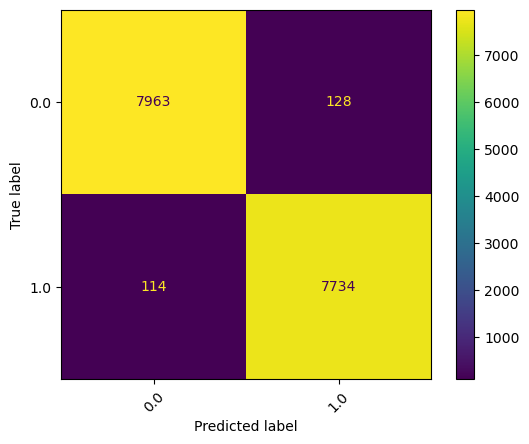

In [79]:
ConfusionMatrixDisplay.from_estimator(lr,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [80]:
class_report(lr)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      8091
         1.0       0.98      0.99      0.98      7848

    accuracy                           0.98     15939
   macro avg       0.98      0.98      0.98     15939
weighted avg       0.98      0.98      0.98     15939



## Random Forest

In [81]:
rf_Gridsearch = RandomForestClassifier(n_estimators = 100 , max_depth = 10)
Kfold(rf_Gridsearch, "Random Forest")
train(rf_Gridsearch, "Random Forest")

Random Forest score on cross validation: 98.70284350628584%
Random Forest model score on Training data: 98.94386816128493%
Random Forest model score on Testing data: 98.65738126607691%


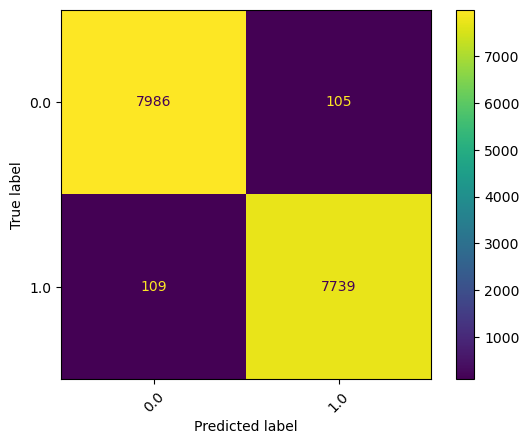

In [82]:
ConfusionMatrixDisplay.from_estimator(rf_Gridsearch,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [83]:
class_report(rf_Gridsearch)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      8091
         1.0       0.99      0.99      0.99      7848

    accuracy                           0.99     15939
   macro avg       0.99      0.99      0.99     15939
weighted avg       0.99      0.99      0.99     15939



In [84]:
rf = RandomForestClassifier(n_estimators = 100 , max_depth = 50)
Kfold(rf, "Random Forest")
train(rf, "Random Forest")

Random Forest score on cross validation: 98.38444091814894%
Random Forest model score on Training data: 99.84314873682449%
Random Forest model score on Testing data: 98.35623313884183%


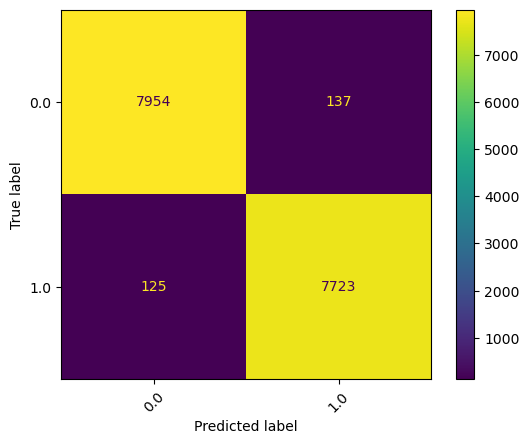

In [85]:
ConfusionMatrixDisplay.from_estimator(rf,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [86]:
class_report(rf)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      8091
         1.0       0.98      0.98      0.98      7848

    accuracy                           0.98     15939
   macro avg       0.98      0.98      0.98     15939
weighted avg       0.98      0.98      0.98     15939



## KNN

In [87]:
knn_Gridsearch = KNeighborsClassifier(n_neighbors=7,weights='uniform')
Kfold(knn_Gridsearch, "KNN")
train(knn_Gridsearch, "KNN")

KNN score on cross validation: 98.6024606982065%
KNN model score on Training data: 98.87276225531203%
KNN model score on Testing data: 98.58836815358555%


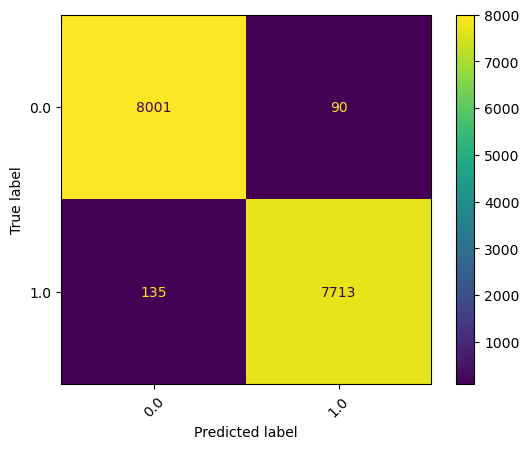

In [88]:
ConfusionMatrixDisplay.from_estimator(knn_Gridsearch,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [89]:
class_report(knn_Gridsearch)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      8091
         1.0       0.99      0.98      0.99      7848

    accuracy                           0.99     15939
   macro avg       0.99      0.99      0.99     15939
weighted avg       0.99      0.99      0.99     15939



In [90]:
knn = KNeighborsClassifier()
Kfold(knn, "KNN")
train(knn, "KNN")

KNN score on cross validation: 98.54285703741974%
KNN model score on Training data: 98.89158440689309%
KNN model score on Testing data: 98.49425936382458%


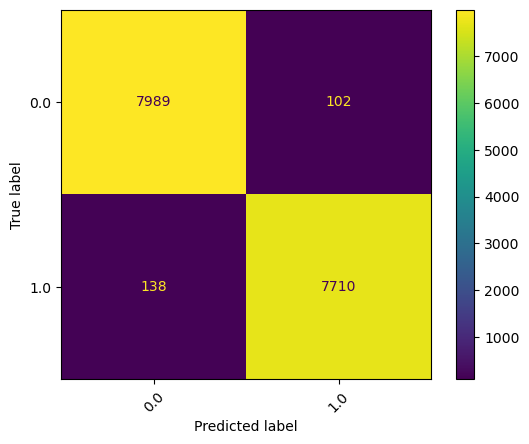

In [91]:
ConfusionMatrixDisplay.from_estimator(knn,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [92]:
class_report(knn)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      8091
         1.0       0.99      0.98      0.98      7848

    accuracy                           0.98     15939
   macro avg       0.98      0.98      0.98     15939
weighted avg       0.98      0.98      0.98     15939



## Bagging

In [93]:
bagg_model_Gridsearch = BaggingClassifier(n_estimators=100)
Kfold(bagg_model_Gridsearch, "Bagging")
train(bagg_model_Gridsearch, "Bagging")

Bagging score on cross validation: 98.2840534356779%
Bagging model score on Training data: 99.84314873682449%
Bagging model score on Testing data: 98.29349394566785%


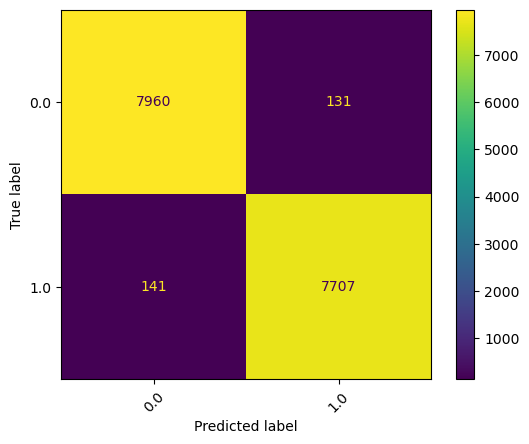

In [94]:
ConfusionMatrixDisplay.from_estimator(bagg_model_Gridsearch,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [95]:
class_report(bagg_model_Gridsearch)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      8091
         1.0       0.98      0.98      0.98      7848

    accuracy                           0.98     15939
   macro avg       0.98      0.98      0.98     15939
weighted avg       0.98      0.98      0.98     15939



In [96]:
bagg_model = BaggingClassifier()
Kfold(bagg_model, "Bagging")
train(bagg_model, "Bagging")

Bagging score on cross validation: 98.22288163948139%
Bagging model score on Training data: 99.71975907645975%
Bagging model score on Testing data: 98.20565907522429%


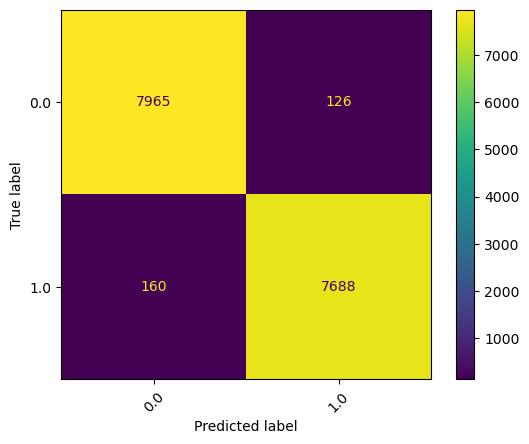

In [97]:
ConfusionMatrixDisplay.from_estimator(bagg_model,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [98]:
class_report(bagg_model)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      8091
         1.0       0.98      0.98      0.98      7848

    accuracy                           0.98     15939
   macro avg       0.98      0.98      0.98     15939
weighted avg       0.98      0.98      0.98     15939



## Gradient Boosting

In [99]:
gb_model_Gridsearch = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3)
Kfold(gb_model_Gridsearch, "Boosting")
train(gb_model_Gridsearch, "Boosting")

Boosting score on cross validation: 98.79538563731641%
Boosting model score on Training data: 98.83930065250125%
Boosting model score on Testing data: 98.78913357174227%


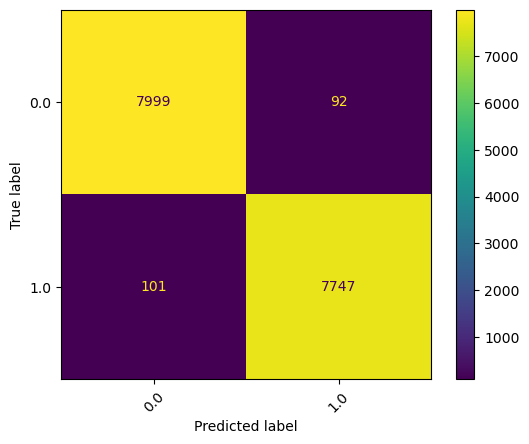

In [100]:
ConfusionMatrixDisplay.from_estimator(gb_model_Gridsearch,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [101]:
class_report(gb_model_Gridsearch)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      8091
         1.0       0.99      0.99      0.99      7848

    accuracy                           0.99     15939
   macro avg       0.99      0.99      0.99     15939
weighted avg       0.99      0.99      0.99     15939



In [102]:
gb_model = GradientBoostingClassifier(n_estimators=200)
Kfold(gb_model, "Boosting")
train(gb_model, "Boosting")

Boosting score on cross validation: 98.77813294954116%
Boosting model score on Training data: 98.87694495566338%
Boosting model score on Testing data: 98.75776397515527%


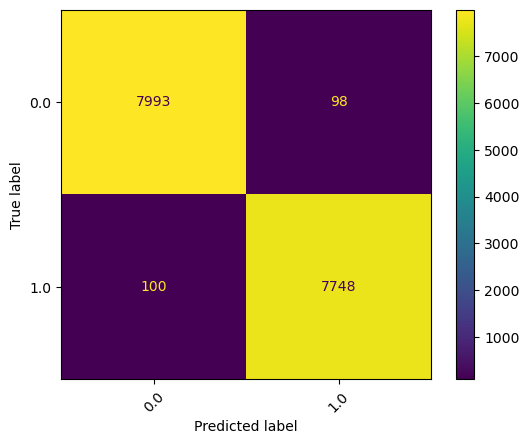

In [103]:
ConfusionMatrixDisplay.from_estimator(gb_model,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [104]:
class_report(gb_model)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      8091
         1.0       0.99      0.99      0.99      7848

    accuracy                           0.99     15939
   macro avg       0.99      0.99      0.99     15939
weighted avg       0.99      0.99      0.99     15939



## Decision Tree

In [105]:
dt_model_GridSeaarch = DecisionTreeClassifier(criterion='entropy',max_depth=None)
Kfold(dt_model_GridSeaarch, "Decision Tree")
train(dt_model_GridSeaarch, "Decision Tree")

Decision Tree score on cross validation: 97.86369252343347%
Decision Tree model score on Training data: 99.84314873682449%
Decision Tree model score on Testing data: 97.948428383211%


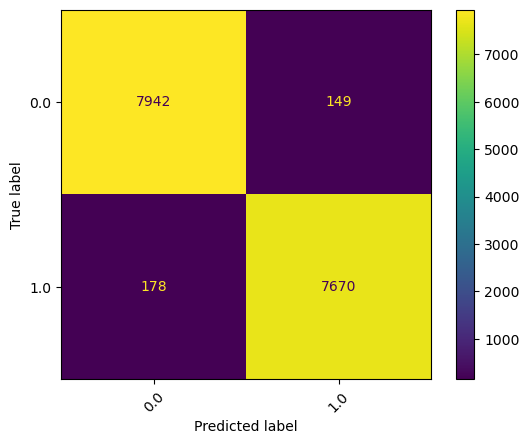

In [106]:
ConfusionMatrixDisplay.from_estimator(dt_model_GridSeaarch,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [107]:
class_report(dt_model_GridSeaarch)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      8091
         1.0       0.98      0.98      0.98      7848

    accuracy                           0.98     15939
   macro avg       0.98      0.98      0.98     15939
weighted avg       0.98      0.98      0.98     15939



In [108]:
dt_model = DecisionTreeClassifier()
Kfold(dt_model, "Decision Tree")
train(dt_model, "Decision Tree")

Decision Tree score on cross validation: 97.86996531109307%
Decision Tree model score on Training data: 99.84314873682449%
Decision Tree model score on Testing data: 97.85431959345003%


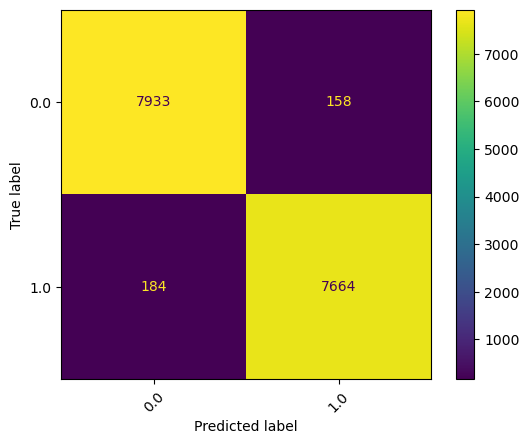

In [109]:
ConfusionMatrixDisplay.from_estimator(dt_model,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [110]:
class_report(dt_model)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      8091
         1.0       0.98      0.98      0.98      7848

    accuracy                           0.98     15939
   macro avg       0.98      0.98      0.98     15939
weighted avg       0.98      0.98      0.98     15939



## Xgboost

In [111]:
xgboost_GridSearch = model = XGBClassifier(max_depth = 3 , learning_rate = 0.1 ,n_estimators = 100)
Kfold(xgboost_GridSearch, "Xgboost")
train(xgboost_GridSearch, "Xgboost")

Xgboost score on cross validation: 98.78597608679607%
Xgboost model score on Training data: 98.85394010373096%
Xgboost model score on Testing data: 98.82677708764666%


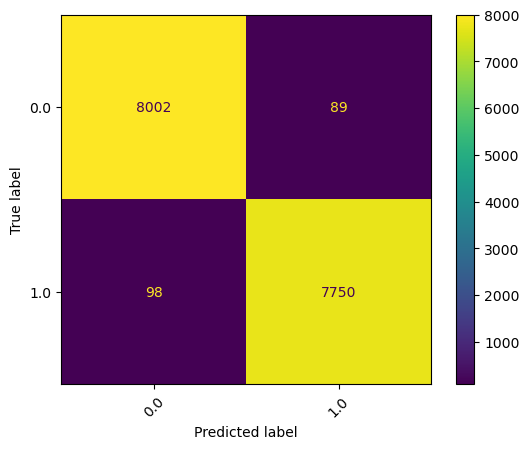

In [112]:
ConfusionMatrixDisplay.from_estimator(xgboost_GridSearch,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [113]:
class_report(xgboost_GridSearch)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      8091
         1.0       0.99      0.99      0.99      7848

    accuracy                           0.99     15939
   macro avg       0.99      0.99      0.99     15939
weighted avg       0.99      0.99      0.99     15939



In [114]:
xgboost = model = XGBClassifier(objective = "binary:logistic" , subsample = 0.7 , min_child_weight = 3,
                                max_depth = 3 , learning_rate = 0.1 , gamma = 0 , colsample_bytree = 0.5,)
Kfold(xgboost, "Xgboost")
train(xgboost, "Xgboost")

Xgboost score on cross validation: 98.78597436465176%
Xgboost model score on Training data: 98.82884390162289%
Xgboost model score on Testing data: 98.77658573310747%


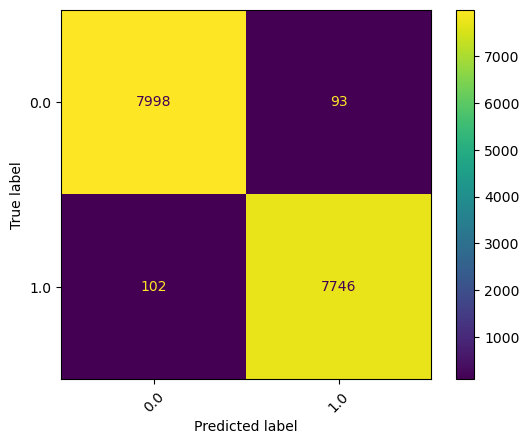

In [115]:
ConfusionMatrixDisplay.from_estimator(xgboost,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [116]:
class_report(xgboost)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      8091
         1.0       0.99      0.99      0.99      7848

    accuracy                           0.99     15939
   macro avg       0.99      0.99      0.99     15939
weighted avg       0.99      0.99      0.99     15939



- Best Model is XGBoost with recall 90.0%

## Save XGBoost Model 

In [118]:
joblib.dump(xgboost,'XGBoost_model.pkl')

['XGBoost_model.pkl']